# Data Pre-processing and Visualization

## Data Loading

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import regex as re
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt


class Counter:
    def __init__(self, start_value: int = 42) -> None:
        self.__start_value = start_value

    def get_next(self):
        self.__start_value += 1
        return self.__start_value


file_name = "dataset_all_days_started_30_06_23"
data_path = f'/workspaces/msc_thesis/data/final_data/{file_name}.csv'
print(f'{data_path=}')

figure_base_path = f"/workspaces/msc_thesis/data/figures/modelling/{file_name}/"
if not os.path.exists(figure_base_path):
    os.makedirs(figure_base_path)
print(f'{figure_base_path=}')


def safe_save_fig(output_path):
    """Helper method to safe figures in a potentially non-existent directory."""
    dir_name = os.path.dirname(output_path)
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
    plt.savefig(output_path)


df: pd.DataFrame = pd.read_csv(filepath_or_buffer=data_path, header=0)

print(f'{len(df)=}.')
print(f'{len(df.columns)=}\n')
print(f'{df.columns=}')

# The number of headers containing metadata; i.e., the stuff that's unusable for inference.
meta_header_count = 5
pr_merged_key = 'PullRequestIsMerged'

random_state_counter = Counter()


data_path='/workspaces/msc_thesis/data/final_data/dataset_all_days_started_30_06_23.csv'
figure_base_path='/workspaces/msc_thesis/data/figures/modelling/dataset_all_days_started_30_06_23/'
len(df)=1373656.
len(df.columns)=42

df.columns=Index(['ID', 'Project Name', 'Submitter ID', 'PR Number', 'Closed At',
       'ControlIntegratedBySameUser', 'ControlPullRequestLifeTimeInMinutes',
       'ControlPullRequestHasComments', 'ControlNumberOfCommitsInPullRequest',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription', 'PullRequestIsMerged',
       'SubmitterIsFirstTimeContributor',
       'ControlIntraProjectPullRequestExperienceOfIntegrator',
       'IntraProjectSubmitterPullRequestSubmissionCount',
       'IntraProjectSubmitterPullRequestSuccessRate',
       'IntraProjectSubmitterPullRequestCommentCount',
       'EcosystemExperienceSubmitterPullRequestSuccessRate',
       'EcosystemExperienceSubmitterPullRequestSubmissionCount',
       'EcosystemExpe

## Field classification

Defines fields that should be log-transformed, removed entirely, or are a binary variable.

In [2]:
binary_fields = [
    "ControlHasHashTagInDescription",
    "ControlIntegratedBySameUser",
    "ControlPullRequestHasCommentByExternalUser",
    "ControlPullRequestHasComments",
    "SubmitterIsFirstTimeContributor",
]

print(f'{len(binary_fields)=}')

print(f'{df.columns=}')
print(f'{df.columns[df.isna().any()].tolist()=}')
# df = df.dropna()


len(binary_fields)=5
df.columns=Index(['ID', 'Project Name', 'Submitter ID', 'PR Number', 'Closed At',
       'ControlIntegratedBySameUser', 'ControlPullRequestLifeTimeInMinutes',
       'ControlPullRequestHasComments', 'ControlNumberOfCommitsInPullRequest',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription', 'PullRequestIsMerged',
       'SubmitterIsFirstTimeContributor',
       'ControlIntraProjectPullRequestExperienceOfIntegrator',
       'IntraProjectSubmitterPullRequestSubmissionCount',
       'IntraProjectSubmitterPullRequestSuccessRate',
       'IntraProjectSubmitterPullRequestCommentCount',
       'EcosystemExperienceSubmitterPullRequestSuccessRate',
       'EcosystemExperienceSubmitterPullRequestSubmissionCount',
       'EcosystemExperienceSubmitterPullRequestCommentCount',
       'SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator',
       'SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter',
    

## Data Visualization

### Creating pulls over time histogram

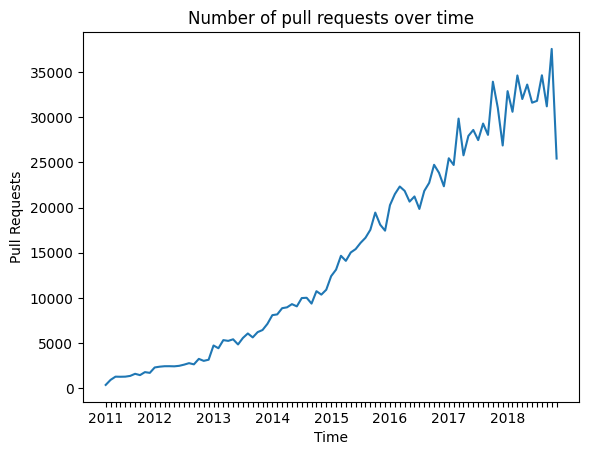

In [3]:
dates = pd.to_datetime(df['Closed At'], format="%Y-%m-%dT%H:%M:%SZ")

pr_count_per_year_month = dates.groupby(
    [dates.dt.year, dates.dt.month]).count()
axs = pr_count_per_year_month.plot(kind="line")

# Fixes x-ticks to be less cluttered.
xticks_years = []
last_year = -1
for (year, _) in pr_count_per_year_month.keys():
    if last_year != year:
        last_year = year
        xticks_years.append(year)
    else:
        xticks_years.append('')
axs.set_xticks(range(len(xticks_years)))
axs.set_xticklabels(xticks_years)

axs.set_xlabel("Time")
axs.set_ylabel("Pull Requests")
axs.set_title("Number of pull requests over time")

output_path = f'{figure_base_path}/demographics/pr_count_per_year_month.png'
safe_save_fig(output_path)

plt.show()


### Creating pulls per project histogram

percentile=98
percentile_index=18483
Top project count: 378
Pull Requests below 98th percentile: 716770/1373656 (52.180%)



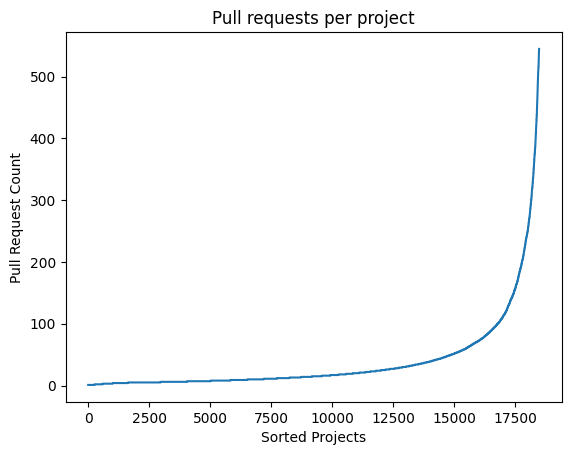

In [4]:

def __plot(__df, figure_name: str):
    plt.clf()
    axs = __df.plot(kind="line", use_index=False)
    axs.set_xlabel("Sorted Projects")
    axs.set_ylabel("Pull Request Count")
    axs.set_title("Pull requests per project")
    output_path = f'{figure_base_path}/demographics/{figure_name}.png'
    safe_save_fig(output_path)


# all data plot
pr_count_per_project = dates.groupby(df['Project Name']).count()
pr_count_per_project = pr_count_per_project.sort_values()
__plot(pr_count_per_project, "prs_per_project_all")

# up to 97th Percentile plot
project_count = len(pr_count_per_project)
# NOTE: with the 74th percentile the PR counts of the capped
# elite and the rest are approximately equal. The total number
# of entries is then 479.801.
percentile = 98
print(f'{percentile=}')
percentile_index = math.floor(project_count * percentile / 100)
print(f'{percentile_index=}')
print(f'Top project count: {project_count - percentile_index}')
perc_data = pr_count_per_project.iloc[:percentile_index]
__plot(perc_data, f"prs_per_project_up_to_{percentile}th_percentile")

# Printing some stats.
total_pull_count = sum(pr_count_per_project.values)
bottom_pull_count = sum(perc_data.values)
ratio = 100 * bottom_pull_count / total_pull_count
print(f'Pull Requests below {percentile}th percentile: '
      + f'{bottom_pull_count}/{total_pull_count} ({ratio:.03f}%)\n')

# # TODO: Figure out whether a cap should be used.
# pulls_cap = max(perc_data.values)
# capped_top_pulls_count = pulls_cap * (project_count - percentile_index)
# print(f'{pulls_cap=}')
# print(f'{capped_top_pulls_count=}')
# print(f'{bottom_pull_count + capped_top_pulls_count=}')


### Creating predictor histograms

ControlIntegratedBySameUser
ControlPullRequestLifeTimeInMinutes
ControlPullRequestHasComments
ControlNumberOfCommitsInPullRequest
ControlPullRequestHasCommentByExternalUser
ControlHasHashTagInDescription
PullRequestIsMerged
SubmitterIsFirstTimeContributor
ControlIntraProjectPullRequestExperienceOfIntegrator
IntraProjectSubmitterPullRequestSubmissionCount
IntraProjectSubmitterPullRequestSuccessRate
IntraProjectSubmitterPullRequestCommentCount
EcosystemExperienceSubmitterPullRequestSuccessRate
EcosystemExperienceSubmitterPullRequestSubmissionCount
EcosystemExperienceSubmitterPullRequestCommentCount
SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator
SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter
SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByIntegrator
SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter
SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter
DependencyEcosystemExperienceSubmitterP

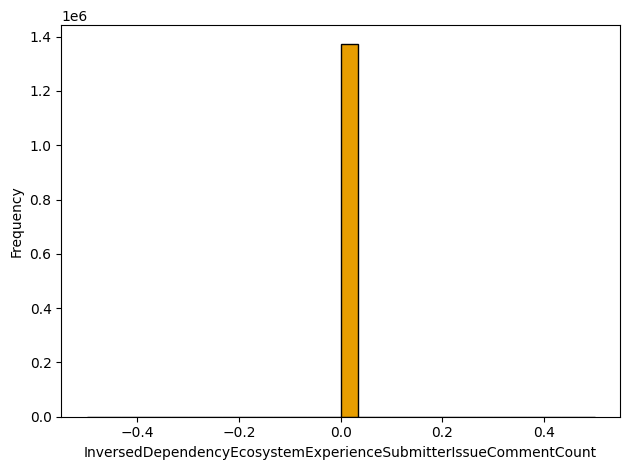

In [5]:
import copy
# shown_fields_without_zeroes = [
#     *log_transformed_fields,
#     *new_log_transformed_fields
# ]
# rx = r'.*(NumberOfCommitsInPullRequest|PullRequestLifeTimeInMinutes).*'
# shown_fields_without_zeroes = set([entry for entry in shown_fields_without_zeroes
#                                    if len(list(re.finditer(rx, entry))) == 0])
# print(f'{shown_fields_without_zeroes=}')

default_plot_settings = {
    'edgecolor': 'black',
    'color': "#e69d00"
}

default_plot_settings_2 = copy.deepcopy(default_plot_settings)
default_plot_settings_2['color'] = "#56b3e9"


def __fix_x_label_fontsize(__column):
    # Adjusts x-label's fontsize to fit the text.
    fig = plt.gcf()
    fig_width = fig.get_figwidth()
    xlabel_fontsize = int(fig_width * 100 / len(__column))
    ax = plt.gca()
    orig_fontsize = ax.xaxis.label.get_fontsize()
    ax.xaxis.label.set_fontsize(min(xlabel_fontsize, orig_fontsize))


def create_histogram(__df: pd.DataFrame, __column: str, subfolder_name: str = ""):
    print(__column)
    plt.clf()
    entries = __df[__column]

    if __column in binary_fields or __column == pr_merged_key:
        entries = __df[__column].replace({False: 0, True: 1})
        plt.xticks([0, 1], ['False', 'True'])
        plt.hist(entries, bins=2, **default_plot_settings)
        plt.ylabel('Frequency')
    # elif column in shown_fields_without_zeroes:
    #     _, bins, _ = plt.hist(entries, bins=30, alpha=1,
    #              label="All Data", **default_plot_settings)
    #     ax:plt.Axes = plt.gca()
    #     ax.set_ylabel("Frequency")
    #     ax.set_xlabel(column)
    #     __fix_x_label_fontsize()

    #     filtered_data = __df[column][__df[column] != 0]
    #     ax2 = ax.twinx()

    #     ax2.hist(filtered_data, bins, alpha=0.5,
    #              label='Excl. zeroes',**default_plot_settings_2)
    #     ax2.set_ylabel("Frequency (Excl. Zeroes)")
    #     ax2.set_zorder(10)
    #     plt.tight_layout()
    else:
        plt.hist(entries, bins=30, **default_plot_settings)
        plt.ylabel('Frequency')

    plt.xlabel(__column)
    __fix_x_label_fontsize(__column)
    plt.tight_layout()

    output_path = f"{figure_base_path}/distributions/{subfolder_name}/{__column}.png"
    safe_save_fig(output_path)

def create_predictor_histograms(__df: pd.DataFrame, subfolder_name: str = ""):
    # Iterate over the columns and generate histograms
    for column in __df.columns[meta_header_count:]:
        create_histogram(__df, column, subfolder_name)

create_predictor_histograms(df)


## Data Sieving

Removes unused variables.

len(log_transformed_fields)=17
log10(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)
log10(1 + ControlNumberOfCommitsInPullRequest)
log10(1 + ControlPullRequestLifeTimeInMinutes)
log10(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)
log10(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)
log10(1 + EcosystemExperienceSubmitterIssueCommentCount)
log10(1 + EcosystemExperienceSubmitterIssueSubmissionCount)
log10(1 + EcosystemExperienceSubmitterPullRequestCommentCount)
log10(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)
log10(1 + IntraProjectSubmitterPullRequestCommentCount)
log10(1 + IntraProjectSubmitterPullRequestSubmissionCount)
log10(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)
log10(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)
log10(1 + SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter)
log10(1 + SharedExperienceIssueSubmittedBySubmitterCommented

,ID,Submitter ID,PR Number,IntraProjectSubmitterPullRequestSuccessRate,EcosystemExperienceSubmitterPullRequestSuccessRate,SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByIntegrator,SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter,SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter,DependencyEcosystemExperienceSubmitterPullRequestSuccessRate,InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate,...,log10(1 + EcosystemExperienceSubmitterPullRequestCommentCount),log10(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount),log10(1 + IntraProjectSubmitterPullRequestCommentCount),log10(1 + IntraProjectSubmitterPullRequestSubmissionCount),log10(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount),log10(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount),log10(1 + SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter),log10(1 + SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator),log10(1 + SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter),log10(1 + SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator)
count,1.373656e+06,1.373656e+06,1.373656e+06,1.373656e+06,1.373656e+06,1373656.0,1373656.0,1373656.0,1373656.0,1373656.0,...,1.373656e+06,1.373656e+06,1.373656e+06,1.373656e+06,1373656.0,1373656.0,1.373656e+06,1.373656e+06,1.373656e+06,1.373656e+06
mean,1.024500e+08,4.096815e+06,3.099089e+03,5.441955e-01,4.830723e-01,0.0,0.0,0.0,0.0,0.0,...,9.238868e-01,8.462845e-01,8.667307e-01,8.819451e-01,0.0,0.0,1.753161e-06,2.191451e-07,7.161693e-02,2.777609e-01
std,6.787729e+07,6.297886e+06,6.737953e+03,4.518630e-01,4.123227e-01,0.0,0.0,0.0,0.0,0.0,...,9.715721e-01,8.439078e-01,9.630265e-01,8.570660e-01,0.0,0.0,7.264649e-04,2.568448e-04,2.935628e-01,5.347647e-01
min,6.870000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.174055e+07,3.785570e+05,8.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.806450e+07,1.334295e+06,4.330000e+02,8.059701e-01,5.894737e-01,0.0,0.0,0.0,0.0,0.0,...,6.020600e-01,6.020600e-01,4.771213e-01,6.989700e-01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.597280e+08,5.213588e+06,2.307000e+03,9.741379e-01,8.823529e-01,0.0,0.0,0.0,0.0,0.0,...,1.643453e+00,1.462398e+00,1.579784e+00,1.568202e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.010300e-01
max,2.330831e+08,4.524566e+07,5.070000e+04,1.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,0.0,...,4.143327e+00,3.566437e+00,4.142890e+00,3.540830e+00,0.0,0.0,3.010300e-01,3.010300e-01,2.880242e+00,3.078457e+00


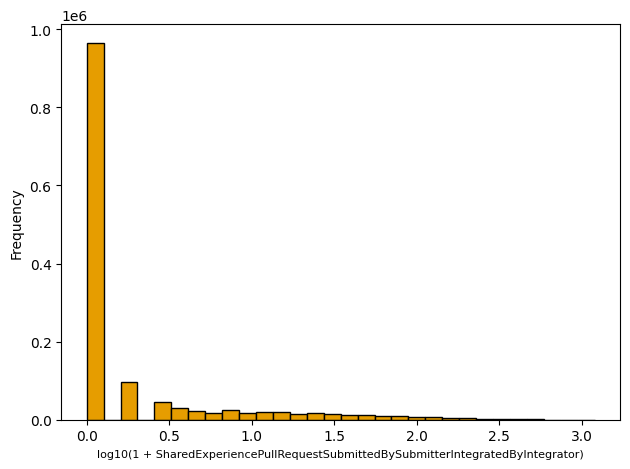

In [6]:
log_transformed_fields = [
    "ControlIntraProjectPullRequestExperienceOfIntegrator",
    "ControlNumberOfCommitsInPullRequest",
    "ControlPullRequestLifeTimeInMinutes",

    "DependencyEcosystemExperienceSubmitterPullRequestCommentCount",
    "DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount",

    "EcosystemExperienceSubmitterIssueCommentCount",
    "EcosystemExperienceSubmitterIssueSubmissionCount",
    "EcosystemExperienceSubmitterPullRequestCommentCount",
    "EcosystemExperienceSubmitterPullRequestSubmissionCount",

    "IntraProjectSubmitterPullRequestCommentCount",
    "IntraProjectSubmitterPullRequestSubmissionCount",

    "InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount",
    "InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount",

    "SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter",
    "SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator",
    "SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter",
    "SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator",
]

print(f'{len(log_transformed_fields)=}')

new_log_transformed_fields = []
for field in log_transformed_fields:
    new_field_name = f'log10(1 + {field})'
    new_log_transformed_fields.append(new_field_name)
    df[new_field_name] = np.log10(1 + df[field])
    create_histogram(df, new_field_name)

df = df.drop(log_transformed_fields, axis=1)

df.describe()


Removes unusable fields.

In [7]:
removed_fields = [
    "DependencyEcosystemExperienceSubmitterIssueCommentCount",
    "DependencyEcosystemExperienceSubmitterIssueSubmissionCount",

    "IntraProjectSubmitterIssueCommentCount",
    "IntraProjectSubmitterIssueSubmissionCount",
    
    "InversedDependencyEcosystemExperienceSubmitterIssueCommentCount",
    "InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount",

    "SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter",
    "SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter",
    "SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter",
    "SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByIntegrator",
]

print(f'{len(removed_fields)=}')

df = df.drop(removed_fields, axis=1)

len(removed_fields)=10


Downsamples the dataset in case you set ``sample`` to ``>0`` (for debugging).

In [8]:
sample_size = 0
if sample_size > 0:
    df = df.sample(sample_size)
    print("WARNING: TRAINING WITH SAMPLE!")


## Creating train and test data.

In [9]:
# Calculates class imbalance.
class_counts = df[pr_merged_key].value_counts()
class_imbalance = max(class_counts) / min(class_counts)
majority_class = class_counts[np.argmax(class_counts)]
print(f'{class_counts=}')
print(f'{class_imbalance=}\n')


def is_majority_class(label) -> bool:
    """
    Helper method for standardizing majority 
    class filtering later in the notebook.
    """

    # NOTE: You have to manually change this
    # if the majority class is different.
    return label


def get_imbalance_weights(__df):
    return list([1.0 if is_majority_class(label) else class_imbalance
                 for label in __df])


# Makes 80:20 dataset splits for testing/training
train, test = train_test_split(df, test_size=0.2)
print(f'{len(train)=}, {len(test)=}\n')

# Labels
train_labels = train[pr_merged_key]
test_labels = test[pr_merged_key]
all_labels = df[pr_merged_key]

# Imbalance weights
train_imbalance_weights = get_imbalance_weights(train_labels)
test_imbalance_weights = get_imbalance_weights(test_labels)

# Predictors
used_predictor_labels = df.columns[meta_header_count:].drop(pr_merged_key)
train_predictors = train[used_predictor_labels]
test_predictors = test[used_predictor_labels]
all_predictors = df[used_predictor_labels]
print(f'{len(used_predictor_labels)=}')
print(f'{used_predictor_labels=}')

print(all_predictors)

all_predictors.describe()


class_counts=PullRequestIsMerged
True     1028067
False     345589
Name: count, dtype: int64
class_imbalance=2.9748255876199763



len(train)=1098924, len(test)=274732

len(used_predictor_labels)=26
used_predictor_labels=Index(['ControlIntegratedBySameUser', 'ControlPullRequestHasComments',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription', 'SubmitterIsFirstTimeContributor',
       'IntraProjectSubmitterPullRequestSuccessRate',
       'EcosystemExperienceSubmitterPullRequestSuccessRate',
       'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate',
       'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate',
       'log10(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)',
       'log10(1 + ControlNumberOfCommitsInPullRequest)',
       'log10(1 + ControlPullRequestLifeTimeInMinutes)',
       'log10(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)',
       'log10(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)',
       'log10(1 + EcosystemExperienceSubmitterIssueCommentCount)',
       'log10(1 + Eco

,IntraProjectSubmitterPullRequestSuccessRate,EcosystemExperienceSubmitterPullRequestSuccessRate,DependencyEcosystemExperienceSubmitterPullRequestSuccessRate,InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate,log10(1 + ControlIntraProjectPullRequestExperienceOfIntegrator),log10(1 + ControlNumberOfCommitsInPullRequest),log10(1 + ControlPullRequestLifeTimeInMinutes),log10(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount),log10(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount),log10(1 + EcosystemExperienceSubmitterIssueCommentCount),...,log10(1 + EcosystemExperienceSubmitterPullRequestCommentCount),log10(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount),log10(1 + IntraProjectSubmitterPullRequestCommentCount),log10(1 + IntraProjectSubmitterPullRequestSubmissionCount),log10(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount),log10(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount),log10(1 + SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter),log10(1 + SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator),log10(1 + SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter),log10(1 + SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator)
count,1.373656e+06,1.373656e+06,1373656.0,1373656.0,1.373656e+06,1.373656e+06,1.373656e+06,1373656.0,1373656.0,1.373656e+06,...,1.373656e+06,1.373656e+06,1.373656e+06,1.373656e+06,1373656.0,1373656.0,1.373656e+06,1.373656e+06,1.373656e+06,1.373656e+06
mean,5.441955e-01,4.830723e-01,0.0,0.0,2.082020e+00,4.632800e-01,2.828570e+00,0.0,0.0,1.373810e+00,...,9.238868e-01,8.462845e-01,8.667307e-01,8.819451e-01,0.0,0.0,1.753161e-06,2.191451e-07,7.161693e-02,2.777609e-01
std,4.518630e-01,4.123227e-01,0.0,0.0,1.020143e+00,2.877907e-01,1.437239e+00,0.0,0.0,1.045902e+00,...,9.715721e-01,8.439078e-01,9.630265e-01,8.570660e-01,0.0,0.0,7.264649e-04,2.568448e-04,2.935628e-01,5.347647e-01
min,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,7.178585e-03,0.0,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.0,0.0,1.322219e+00,3.010300e-01,1.715028e+00,0.0,0.0,4.771213e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.059701e-01,5.894737e-01,0.0,0.0,2.064458e+00,3.010300e-01,2.980526e+00,0.0,0.0,1.301030e+00,...,6.020600e-01,6.020600e-01,4.771213e-01,6.989700e-01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.741379e-01,8.823529e-01,0.0,0.0,2.810233e+00,4.771213e-01,3.871221e+00,0.0,0.0,2.198657e+00,...,1.643453e+00,1.462398e+00,1.579784e+00,1.568202e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.010300e-01
max,1.000000e+00,1.000000e+00,0.0,0.0,4.498214e+00,4.000043e+00,6.590978e+00,0.0,0.0,4.232259e+00,...,4.143327e+00,3.566437e+00,4.142890e+00,3.540830e+00,0.0,0.0,3.010300e-01,3.010300e-01,2.880242e+00,3.078457e+00


# Modelling (Full Model)

## Random Forest

### Model Creation (Weighted)

In [29]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report


def create_weighted_rf_model(__test_labels, __test_predictors, __test_weights,
                             __train_labels, __train_predictors, __train_weights):
    # Model creation and predictions.
    random_state = random_state_counter.get_next()
    print(f'{random_state=}')
    weighted_rf = RandomForestRegressor(
        n_estimators=100, random_state=random_state)
    weighted_rf.fit(__train_predictors, __train_labels,
                    sample_weight=__train_weights)

    predictions = weighted_rf.predict(__test_predictors)
    predictions = [pred >= 0.5 for pred in predictions]

    # Absolute error
    absolute_error = abs(predictions ^ __test_labels)
    print(f'Absolute error: {absolute_error}')

    # F1 scores.
    conf = confusion_matrix(__test_labels, predictions,
                            sample_weight=__test_weights)
    weighted_f1 = f1_score(__test_labels, predictions,
                           sample_weight=__test_weights)
    print(f'{weighted_f1=}')
    unweighted_f1 = f1_score(__test_labels, predictions)
    print(f'{unweighted_f1=}')

    # Other metrics.
    print(f'{conf=}')
    print(classification_report(
        __test_labels, predictions,
        sample_weight=__test_weights
    ))

    return weighted_rf


weighted_rf = create_weighted_rf_model(test_labels, test_predictors, test_imbalance_weights,
                                       train_labels, train_predictors, train_imbalance_weights)


Absolute error: 780324     False
611459      True
385819     False
1316728    False
872051     False
           ...  
1410632    False
272663      True
629420     False
1576931    False
191858     False
Name: PullRequestIsMerged, Length: 365995, dtype: bool
weighted_f1=0.8170202307227868
conf=array([[175619.18741916, 105830.15088051],
       [ 14009.        , 267546.        ]])
              precision    recall  f1-score   support

       False       0.93      0.62      0.75 281449.33829977567
        True       0.72      0.95      0.82  281555.0

    accuracy                           0.79 563004.3382997757
   macro avg       0.82      0.79      0.78 563004.3382997757
weighted avg       0.82      0.79      0.78 563004.3382997757



### Model Creation (Unweighted)

In [32]:
# NOTE: this is mostly in here to make a point about the large differences
# between unweighted and weighted classification, and the fact that people
# seem to disregard class imbalance a lot. Ditto for the logistic regression
# one. I don't particularly care for its results as I don't expect them to
# be better.


def create_unweighted_rf_model(__test_labels, __test_predictors,
                               __train_labels, __train_predictors,
                               __test_imbalance_weights):
    # Model creation and predictions.
    random_state = random_state_counter.get_next()
    print(f'{random_state=}')
    unweighted_rf = RandomForestRegressor(
        n_estimators=100, random_state=random_state)
    unweighted_rf.fit(__train_predictors, __train_labels)

    predictions = unweighted_rf.predict(__test_predictors)
    predictions = [pred >= 0.5 for pred in predictions]

    # Absolute error
    absolute_error = abs(predictions ^ __test_labels)
    print(f'Absolute error: {absolute_error}')

    # F1 scores.
    conf = confusion_matrix(__test_labels, predictions)
    unweighted_f1 = f1_score(__test_labels, predictions)
    print(f'{unweighted_f1=}')
    weighted_f1 = f1_score(__test_labels, predictions,
                           sample_weight=__test_imbalance_weights)
    print(f'{weighted_f1=}')

    # Other metrics.
    print(f'{conf=}')
    print(classification_report(__test_labels, predictions))

    return unweighted_rf


unweighted_rf = create_unweighted_rf_model(test_labels, test_predictors,
                                           train_labels, train_predictors,
                                           test_imbalance_weights)


random_state=43
Absolute error: 780324     False
611459      True
385819     False
1316728    False
872051     False
           ...  
1410632    False
272663      True
629420     False
1576931    False
191858     False
Name: PullRequestIsMerged, Length: 365995, dtype: bool
unweighted_f1=0.9215150304897552
weighted_f1=0.8210379021397648
conf=array([[ 54102,  30338],
       [ 15057, 266498]])
              precision    recall  f1-score   support

       False       0.78      0.64      0.70     84440
        True       0.90      0.95      0.92    281555

    accuracy                           0.88    365995
   macro avg       0.84      0.79      0.81    365995
weighted avg       0.87      0.88      0.87    365995



### Generates partial dependence plots

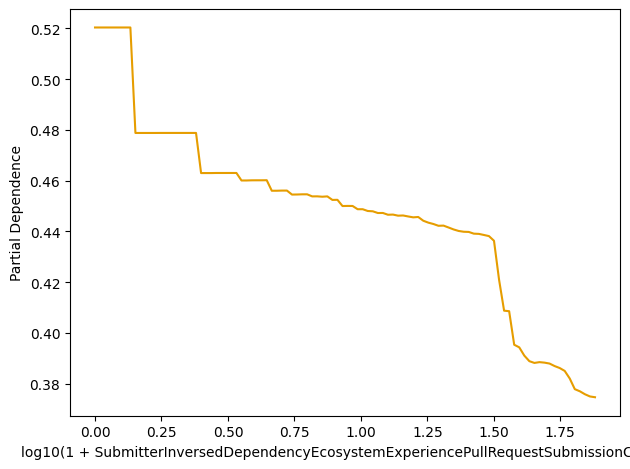

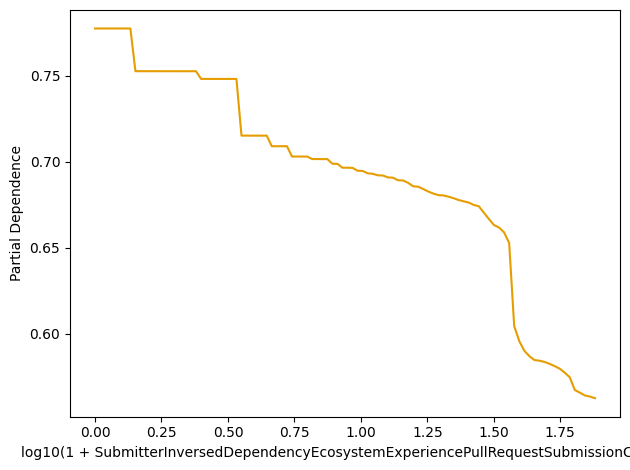

In [33]:
from sklearn.inspection import PartialDependenceDisplay
from matplotlib import pyplot as plt


def create_partial_dependence_plots(__rf, __df, __used_predictor_labels, model_name: str = "", average_only=True):
    if average_only:
        # Collective partial dependence plot.
        PartialDependenceDisplay.from_estimator(
            __rf, __df, __used_predictor_labels)

        fig = plt.gcf()
        axs = fig.axes

        lines = []
        for ax in axs:
            __lines = list([(line.get_xdata(), line.get_ydata())
                            for line in ax.lines])
            lines.extend(__lines)

        for (x, y), label in zip(lines, __used_predictor_labels):
            plt.clf()
            plt.plot(x, y, linestyle='-', color='#e69d00')
            plt.xlabel(label)
            plt.ylabel('Partial Dependence')
            plt.tight_layout()
            output_path = f"{figure_base_path}/partial-dependence/{model_name}/{label}.png"
            safe_save_fig(output_path)

    else:
        # TODO: create a plot where the average response is displayed
        # as a line, and the min/max as a grey area around it.
        pdd = PartialDependenceDisplay.from_estimator(
            __rf, __df, __used_predictor_labels, kind='individual')


create_partial_dependence_plots(weighted_rf,
                                test_predictors, used_predictor_labels,
                                model_name="weighted")

create_partial_dependence_plots(unweighted_rf,
                                test_predictors, used_predictor_labels,
                                model_name="unweighted")


## Logistic Regression

### Model Creation (Unweighted)

In [35]:
from sklearn.linear_model import LogisticRegression


def create_unweighted_lr_model(__train_labels, __train_predictors,
                               __test_labels, __test_predictors,
                               __test_imbalance_weights):

    unweighted_lr = LogisticRegression()
    unweighted_lr.fit(__train_predictors, __train_labels)

    lr_predictions = unweighted_lr.predict(__test_predictors)
    absolute_error = abs(lr_predictions ^ __test_labels)
    print(f'{absolute_error=}')

    mean_accuracy = unweighted_lr.score(__test_predictors, __test_labels)
    print(f'{mean_accuracy=}')

    unweighted_f1 = f1_score(__test_labels, lr_predictions)
    print(f'{unweighted_f1=}')
    weighted_f1 = f1_score(__test_labels, lr_predictions,
                           sample_weight=__test_imbalance_weights)
    print(f'{weighted_f1=}')

    conf = confusion_matrix(__test_labels, lr_predictions)
    print(f'{conf=}')

    print(classification_report(__test_labels, lr_predictions))

    return unweighted_lr


unweighted_lr = create_unweighted_lr_model(train_labels, train_predictors,
                                           test_labels, test_predictors,
                                           test_imbalance_weights)


absolute_error=780324     False
611459     False
385819     False
1316728    False
872051     False
           ...  
1410632    False
272663     False
629420     False
1576931    False
191858     False
Name: PullRequestIsMerged, Length: 365995, dtype: bool
mean_accuracy=0.8232516837661716
unweighted_f1=0.8914058368796113
weighted_f1=0.7487696708130841
conf=array([[ 35803,  48637],
       [ 16052, 265503]])
              precision    recall  f1-score   support

       False       0.69      0.42      0.53     84440
        True       0.85      0.94      0.89    281555

    accuracy                           0.82    365995
   macro avg       0.77      0.68      0.71    365995
weighted avg       0.81      0.82      0.81    365995



### Model Creation (Weighted)

In [36]:
def create_weighted_lr_model(__test_labels, __test_predictors,
                             __test_imbalance_weights,
                             __train_labels, __train_predictors,
                             __train_imbalance_weights):

    weighted_lr = LogisticRegression()
    weighted_lr.fit(__train_predictors, __train_labels,
                    sample_weight=__train_imbalance_weights)

    lr_predictions = weighted_lr.predict(__test_predictors)

    mean_accuracy = weighted_lr.score(__test_predictors, __test_labels,
                                      sample_weight=__test_imbalance_weights)
    print(f'{mean_accuracy=}')

    absolute_error = abs(lr_predictions ^ __test_labels)
    print(f'{absolute_error=}')

    weighted_f1 = f1_score(__test_labels, lr_predictions,
                           sample_weight=__test_imbalance_weights)
    print(f'{weighted_f1=}')
    unweighted_f1 = f1_score(__test_labels, lr_predictions)
    print(f'{unweighted_f1=}')

    conf = confusion_matrix(__test_labels, lr_predictions)
    print(f'{conf=}')

    print(classification_report(__test_labels,
                                lr_predictions,
                                sample_weight=__test_imbalance_weights))

    return weighted_lr


weighted_lr = create_weighted_lr_model(test_labels, test_predictors, test_imbalance_weights,
                                       train_labels, train_predictors, train_imbalance_weights)


mean_accuracy=0.7556671619881425
absolute_error=780324     False
611459     False
385819     False
1316728    False
872051     False
           ...  
1410632    False
272663     False
629420     False
1576931    False
191858     False
Name: PullRequestIsMerged, Length: 365995, dtype: bool
weighted_f1=0.7506917107333777
conf=array([[ 65506,  18934],
       [ 74451, 207104]])
              precision    recall  f1-score   support

       False       0.75      0.78      0.76 281449.33829977567
        True       0.77      0.74      0.75  281555.0

    accuracy                           0.76 563004.3382997757
   macro avg       0.76      0.76      0.76 563004.3382997757
weighted avg       0.76      0.76      0.76 563004.3382997757



### Multicolinearity

In [10]:
value_mapper = {False: 0, True: 1}
for feature in binary_fields:
    all_predictors.loc[:, feature] =all_predictors[feature].replace(value_mapper)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = all_predictors.columns

# calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(all_predictors.values, i)
                 for i in range(all_predictors.shape[1])]
                 
print(vif_df)

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                             variable        VIF
0                         ControlIntegratedBySameUser   3.923555
1                       ControlPullRequestHasComments   4.283786
2          ControlPullRequestHasCommentByExternalUser   1.747287
3                      ControlHasHashTagInDescription   1.624896
4                     SubmitterIsFirstTimeContributor   3.281287
5         IntraProjectSubmitterPullRequestSuccessRate   6.235144
6   EcosystemExperienceSubmitterPullRequestSuccess...   4.534770
7   DependencyEcosystemExperienceSubmitterPullRequ...        NaN
8   InversedDependencyEcosystemExperienceSubmitter...        NaN
9   log10(1 + ControlIntraProjectPullRequestExperi...   6.825564
10     log10(1 + ControlNumberOfCommitsInPullRequest)   3.647571
11     log10(1 + ControlPullRequestLifeTimeInMinutes)   5.488551
12  log10(1 + DependencyEcosystemExperienceSubmitt...        NaN
13  log10(1 + DependencyEcosystemExperienceSubmitt...        NaN
14  log10(1 + EcosystemEx

In [12]:
print(all_predictors.columns)

Index(['ControlIntegratedBySameUser', 'ControlPullRequestHasComments',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription', 'SubmitterIsFirstTimeContributor',
       'IntraProjectSubmitterPullRequestSuccessRate',
       'EcosystemExperienceSubmitterPullRequestSuccessRate',
       'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate',
       'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate',
       'log10(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)',
       'log10(1 + ControlNumberOfCommitsInPullRequest)',
       'log10(1 + ControlPullRequestLifeTimeInMinutes)',
       'log10(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)',
       'log10(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)',
       'log10(1 + EcosystemExperienceSubmitterIssueCommentCount)',
       'log10(1 + EcosystemExperienceSubmitterIssueSubmissionCount)',
       'log10(1 + EcosystemExperienceSubm

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

fields = ['SubmitterDependencyEcosystemExperiencePullRequestSuccessRate', 
          'ControlIntraProjectPullRequestSuccessRateSubmitter']
# print(all_predictors[fields])

endo = all_predictors['SubmitterDependencyEcosystemExperiencePullRequestSuccessRate'].values
exo = all_predictors['SubmitterInversedDependencyEcosystemExperiencePullRequestSuccessRate'].values
lin_mod = sm.OLS(endo, exo)
res = lin_mod.fit()

print(res.summary())
# all_predictors = all_predictors.drop(
#     ["ControlIntraProjectPullRequestSuccessRateSubmitter"], axis=1)

# # create DataFrame to hold VIF values
# vif_df = pd.DataFrame()
# vif_df['variable'] = all_predictors.columns

# # calculate VIF for each predictor variable
# vif_df['VIF'] = [variance_inflation_factor(all_predictors.values, i)
#                  for i in range(all_predictors.shape[1])]

# print(vif_df)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.433e+33
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                        0.00
Time:                        17:37:28   Log-Likelihood:                      5.5728e+07
No. Observations:             1829971   AIC:                                 -1.115e+08
Df Residuals:                 1829970   BIC:                                 -1.115e+08
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Calculate coefficients, p-values etc.

In [88]:
import statsmodels.api as sm


def calculate_lr_stats(__predictors, __labels):
    value_mapper = {False: 0, True: 1}
    for feature in binary_fields:
        __predictors.loc[:, feature] = __predictors[feature].replace(value_mapper)

    replaced_labels = __labels.replace(value_mapper)

    sm_lr = sm.Logit(replaced_labels, __predictors)
    result = sm_lr.fit()
    # result = sm_lr.fit_regularized(maxiter=200)

    print(result.params)

    result.pred_table()

    print('summary 1:')
    print(result.summary())

    print('summary 2:')
    print(result.summary2())


# NOTE: this is done with ALL data; i.e., it doesn't respect the train/test stuff.
calculate_lr_stats(all_predictors, all_labels)


Optimization terminated successfully.
         Current function value: 0.413434
         Iterations 8


LinAlgError: Singular matrix

# Modelling (First-time Contributors Only)

## Dataset creation

In [ ]:
ftc_df = df[df['SubmitterIsFirstTimeContributor']]
print(f'{len(ftc_df)=}')

# Split into train test
ftc_train, ftc_test = train_test_split(ftc_df, test_size=0.2)
print(f'{len(ftc_train)=}, {len(ftc_test)=}\n')

# Get predictors and labels.
ftc_train_predictors = ftc_train[used_predictor_labels]
ftc_train_labels = ftc_train[pr_merged_key]
ftc_test_predictors = ftc_test[used_predictor_labels]
ftc_test_labels = ftc_test[pr_merged_key]

ftc_all_predictors = ftc_df[used_predictor_labels]
ftc_all_labels = ftc_df[pr_merged_key]

# Calculates class imbalance.
class_counts = ftc_df[pr_merged_key].value_counts()
class_imbalance = max(class_counts) / min(class_counts)
majority_class = class_counts[np.argmax(class_counts)]
print(f'{class_counts=}')
print(f'{class_imbalance=}\n')

# Gets imbalance weights.
ftc_train_imbalance_weights = get_imbalance_weights(ftc_train_labels)
ftc_test_imbalance_weights = get_imbalance_weights(ftc_test_labels)


len(ftc_df)=536234
len(ftc_train)=428987, len(ftc_test)=107247

class_counts=PullRequestIsMerged
True     339039
False    197195
Name: count, dtype: int64
class_imbalance=1.7193082988919597



## Dataset Visualization

In [ ]:
create_predictor_histograms(ftc_df, subfolder_name="ftc")

## Random Forest (weighted and unweighted)

In [ ]:
w_rf = create_weighted_rf_model(ftc_test_labels, ftc_test_predictors, ftc_test_imbalance_weights,
                                ftc_train_labels, ftc_train_predictors, ftc_train_imbalance_weights)

create_partial_dependence_plots(w_rf, test_predictors, used_predictor_labels, model_name="ftc_weighted")

# u_rf = create_unweighted_rf_model(ftc_test_labels, ftc_test_predictors,
#                                   ftc_train_labels, ftc_train_predictors,
#                                   ftc_test_imbalance_weights)

# create_partial_dependence_plots(u_rf, test_predictors, used_predictor_labels, model_name="ftc_unweighted")


NameError: name 'create_weighted_rf_model' is not defined

## Logistic Regression (unweighted)

In [ ]:
create_unweighted_lr_model(ftc_test_labels, ftc_test_predictors,
                           ftc_train_labels, ftc_train_predictors,
                           ftc_test_imbalance_weights)

calculate_lr_stats(ftc_all_predictors, ftc_all_labels)
